In [21]:
# time = StickPositions.to_numpy()[:,0]
# x = StickPositions.to_numpy()[:,1]
# y = StickPositions.to_numpy()[:,2]
# z = StickPositions.to_numpy()[:,3]

xyz

In [4]:
import pandas as pd  ##pandas is dataframe (data cleaning add new clumns, clean the columns)
import numpy as np ## nUmpy is an array
import matplotlib.pyplot as plt ##visualisation
import seaborn as sns ##also for visualisation (better looking)
import json

sns.set()

In [5]:
with open('ms1609025.json') as f:
    data = json.load(f)
    
print ("The data is ", data.keys())

The data is  dict_keys(['UserName', 'CorrectMoves', 'Feedback', 'markerEvents', 'moves'])


In [6]:
data['CorrectMoves']

7

In [7]:
moves = data['moves']
# moves

In [8]:
#### If all the moves together
def combine_all(asset, moves):
    df = pd.DataFrame()
    for i in range(len(moves)):
        temp = pd.DataFrame(moves[i][asset])
        df = df.append(temp)
    return df

In [9]:
StickPositions = combine_all('StickPositions', moves)
RedDrumPositions = combine_all('RedDrumPositions', moves)
bludrumposition = combine_all('BlueDrumPositions', moves)
# StickPositions

In [77]:
num_move = 9
StickPositions = pd.DataFrame(moves[num_move]['StickPositions'])
RedDrumPositions = pd.DataFrame(moves[num_move]['RedDrumPositions'])
bludrumposition = pd.DataFrame(moves[num_move]['BlueDrumPositions'])

In [78]:
StickPositions.shape, bludrumposition.shape, RedDrumPositions.shape

((301, 2), (301, 2), (301, 2))

In [79]:
# bludrumposition.head()

In [80]:
def txtsplit(x):
    return x.split(",")[0], x.split(",")[1], x.split(",")[2]

bludrumposition['x'], bludrumposition['y'], bludrumposition['z'] = zip(*bludrumposition['position'].map(txtsplit))
RedDrumPositions['x'], RedDrumPositions['y'], RedDrumPositions['z'] = zip(*RedDrumPositions['position'].map(txtsplit))
StickPositions['x'], StickPositions['y'], StickPositions['z'] = zip(*StickPositions['position'].map(txtsplit))

In [81]:
def time_correction(df):
    """The first time will be the referrence point till the end of the move"""
    
    df['corr_time'] = df['time'].apply(lambda x : float(x)  - int(df.loc[0,'time'].split(".")[0]))
    
    return df

def clean_df(df):
    """remove the position and old time columns"""
    df.drop(labels = ['position', 'time'], axis=1, inplace=True) ##removes positiona nd time column
    df.sort_values(by=['corr_time'], inplace=True) ##sort the df w.r.t time
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype('float32')
    return df[[ 'corr_time','x', 'y', 'z']]

In [82]:
bludrumposition = clean_df(time_correction(bludrumposition.reset_index(drop=True)))
RedDrumPositions = clean_df(time_correction(RedDrumPositions.reset_index(drop=True)))
StickPositions = clean_df(time_correction(StickPositions.reset_index(drop=True)))

In [83]:
# bludrumposition

In [84]:
# x = StickPositions[["corr_time","x"]].to_numpy()[:,0] ####array
# y = StickPositions[["corr_time","x"]].to_numpy()[:,1] ####array

# plt.figure(figsize=(11,6))
# # plt.axis("off")
# plt.yticks(np.arangez(y.min(),y.max()))
# plt.plot(x,y,"*")

In [85]:
xyz = StickPositions.iloc[:,1:].to_numpy()
red = RedDrumPositions.iloc[:,1:].to_numpy()
blue = bludrumposition.iloc[:,1:].to_numpy()

Preparing the data for animation

frames = 100frames/sec

interval = duration of movement

#### 3D Plot

In [86]:
import matplotlib.animation as animation
from IPython.display import HTML
from mpl_toolkits import mplot3d

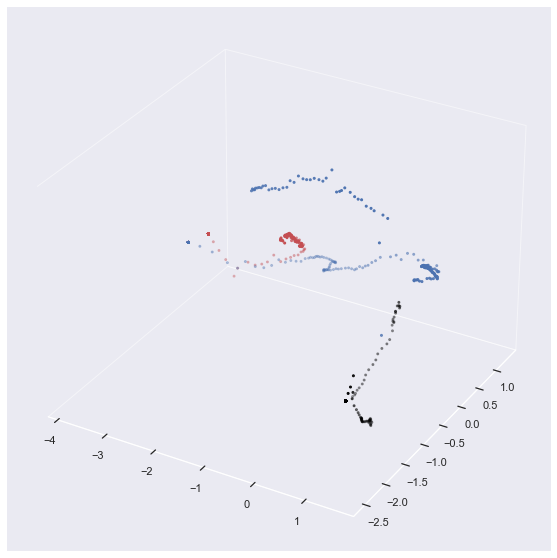

In [87]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection='3d')

ax.xaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.fill = False
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.fill = False
ax.zaxis.pane.set_edgecolor('white')
ax.grid(False)
# Remove z-axis
ax.w_zaxis.line.set_lw(0.)
ax.set_zticks([])


ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2],c='black' ,s=4)
ax.scatter(blue[:,0], blue[:,1], blue[:,2],c='b' ,s=4)
ax.scatter(red[:,0], red[:,1], red[:,2], c='r',s=4)

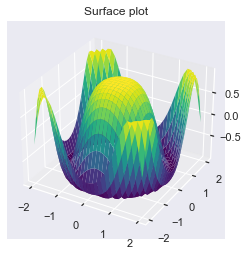

In [64]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
x = np.outer(np.linspace(-2, 2, 30), np.ones(30))
y = x.copy().T # transpose
z = np.cos(x ** 2 + y ** 2)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [72]:
X.shape, Y.shape, xyz.shape

((93, 93), (93, 93), (93, 3))

### 2D Animation

In [23]:
%matplotlib qt

fig, ax = plt.subplots()
line, = ax.plot(x, y, color='k')

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    line.axes.axis([-2, 1, -2, 1])
    return line,

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line],
                              interval=100, blit = True)
ax.set_xlabel(f'x position of Sticks' )
ax.set_ylabel(f'y position of Sticks' )
# ani.save('test.gif')
plt.show()

In [21]:
HTML(ani.to_jshtml())

#### 3d Plot

In [ ]:
1 --> 0.01
100 --> 0.01 *100 --> 1 sec # 100 frames per second

In [38]:
# StickPositions

In [39]:
from matplotlib import pyplot as plt
import numpy as np
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation

In [40]:
# %matplotlib qt   #uncomment to interact with the graph

fig = plt.figure()
ax = p3.Axes3D(fig) ## create empty 3d axis

# Setting the axes properties
ax.set_xlim3d([-2.0, 2.0])
ax.set_xlabel('X')

ax.set_ylim3d([-2.0,2.0])
ax.set_ylabel('Y')

ax.set_zlim3d([-2.0,4.5])
ax.set_zlabel('Z')

line = ax.plot_wireframe(x.reshape(-1,1) ,y.reshape(-1,1) ,z.reshape(-1,1) )

 ### 3D Animation - x,y,z w.r.t time

In [48]:
data3d = pd.merge(pd.DataFrame(timesteps, columns=['corr_time']), StickPositions.round(2), on = 'corr_time', how='left')
data3d = data3d.ffill(axis = 0).bfill(axis=0) ####copied the precious values but we can linear interploation also
# data3d.head()

In [49]:
StickPositions

corr_time         x         y         z
0        0.138 -1.490000  0.000000 -0.013000
1        0.143 -1.490000  0.000000 -0.013000
2        0.164 -1.490000  0.000000 -0.013000
3        0.197 -1.490000  0.000000 -0.013000
4        0.231 -1.490000  0.000000 -0.013000
..         ...       ...       ...       ...
217      7.347  0.364966 -1.153557  4.313080
218      7.380  0.368511 -1.183940  4.371044
219      7.414  0.386295 -1.197218  4.421756
208      7.450  0.449195 -0.864699  3.824955
209      7.800  0.421266 -0.891147  3.854178

[220 rows x 4 columns]

In [50]:
x,y,z = data3d.to_numpy()[:,1], data3d.to_numpy()[:,2], data3d.to_numpy()[:,3]
x.shape,y.shape, z.shape, x.max(), y.max(), z.max()

((806,), (806,), (806,), 0.75, 0.0, 4.420000076293945)

In [51]:
%matplotlib qt
np.random.seed(19680801)




fig = plt.figure()
ax = p3.Axes3D(fig)
# Setting the axes properties
ax.set_xlim3d([-2.0, 2.0])
ax.set_xlabel('X')

ax.set_ylim3d([-2.0,2.0])
ax.set_ylabel('Y')

ax.set_zlim3d([-2.0,4.5])
ax.set_zlabel('Z')

ax.set_title('3D Test')
# Fifty lines of random 3-D lines
# data = [Gen_RandLine(25, 3) for index in range(3)]

line, = ax.plot([] ,[] ,[], lw = 2 )


# def init():
#     line.set_data([], [])
#     line.set_3d_properties([])
#     return line,

def update_lines(num, line, x, y, z):
    line.set_data(x[:num], y[ :num])
    line.set_3d_properties(z[ :num])
    return line,

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, len(data3d), 
                                   fargs=(line, x, y, z),
                                   interval=10, blit=True)

plt.show()